In [1]:
!pip install matplotlib==3.2.2

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly as px

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/MET4OP-UBA/MET4OP/master/dataset/elecciones_2019/resultados/120819-054029/datos_agrup.csv")

In [4]:
#Eliminar esta celda una vez terminado el trabajo
df.head()

,CODIGO_DISTRITO,CODIGO_SECCION,CODIGO_CIRCUITO,CODIGO_MESA,CODIGO_CATEGORIA,CODIGO_AGRUPACION,VOTOS_AGRUPACION,NOMBRE_CATEGORIA,NOMBRE_REGION,NOMBRE_AGRUPACION
0,1,1001,1001000001,0100100001X,100000000000,13,1,Presidente y Vicepresidente de la República,COMUNA 01,MOVIMIENTO AL SOCIALISMO
1,1,1001,1001000001,0100100001X,100000000000,131,5,Presidente y Vicepresidente de la República,COMUNA 01,FRENTE NOS
2,1,1001,1001000001,0100100001X,100000000000,132,2,Presidente y Vicepresidente de la República,COMUNA 01,FRENTE PATRIOTA
3,1,1001,1001000001,0100100001X,100000000000,133,15,Presidente y Vicepresidente de la República,COMUNA 01,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD
4,1,1001,1001000001,0100100001X,100000000000,135,85,Presidente y Vicepresidente de la República,COMUNA 01,JUNTOS POR EL CAMBIO


### INTRODUCCIÓN

Este informe analizará los resultados de las elecciones PASO del 2019 correspondiente al desempeño de la fórmula presidencial en la Ciudad Autónoma de Buenos Aires.

In [5]:
#Dataframe con datos presidenciales
df_presidencial= df.loc[df.NOMBRE_CATEGORIA == "Presidente y Vicepresidente de la República"]

### Resultados totales

Nos da un primer panorama general de la posición de la fórmula en CABA.

- En primer lugar, podemos ver que está consolidado como segunda fuerza debido a la cómoda diferencia respecto a Consenso Federal que obtiene el tercer lugar.
- La diferencia con Juntos por el Cambio?
- Analizar porcentajes a sacar y migracion de votos de los que no alcanzaron el 1,5%.

In [6]:
total=df_presidencial.groupby("NOMBRE_AGRUPACION", as_index=False)["VOTOS_AGRUPACION"].sum().sort_values("VOTOS_AGRUPACION", ascending=False)
total

,NOMBRE_AGRUPACION,VOTOS_AGRUPACION
7,JUNTOS POR EL CAMBIO,863169
3,FRENTE DE TODOS,637891
1,CONSENSO FEDERAL,168607
2,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,75746
13,UNITE POR LA LIBERTAD Y LA DIGNIDAD,68828
0,BLANCO,62397
4,FRENTE NOS,22592
8,MOVIMIENTO AL SOCIALISMO,21470
10,NULO,19116
5,FRENTE PATRIOTA,5172


## Visualización de resultado total

Text(0, 0.5, 'Partido Politico')

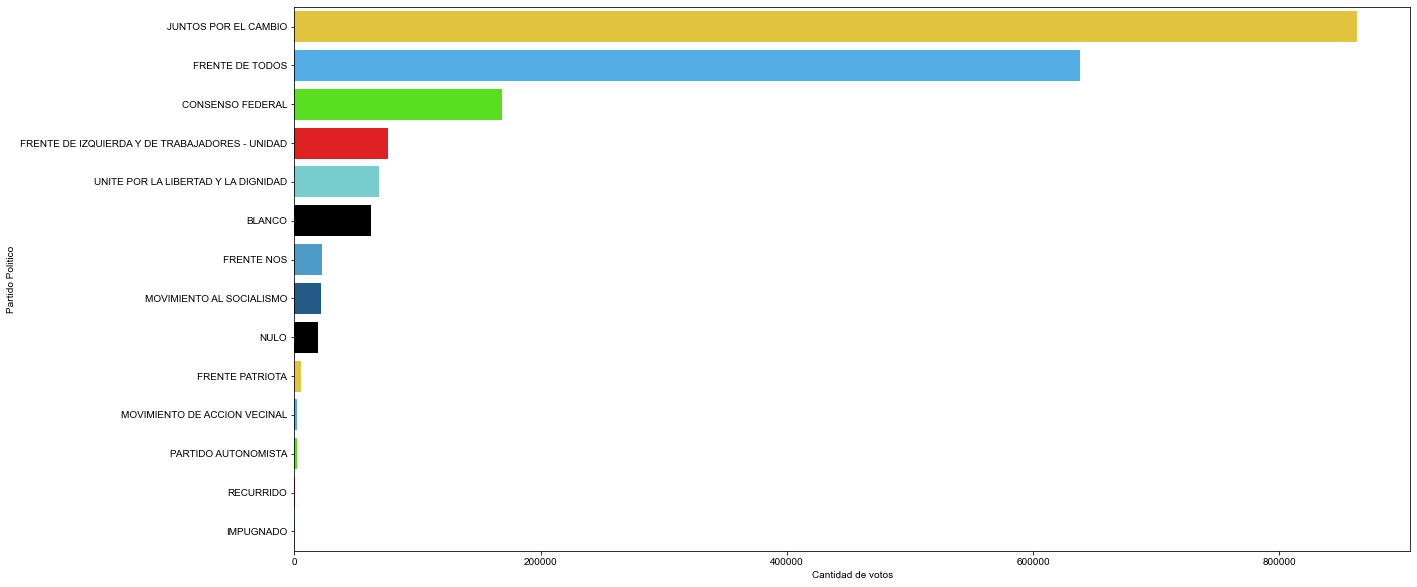

In [7]:
plt.figure(figsize=(20,10))
figura1=sns.barplot(data=total, y="NOMBRE_AGRUPACION", x="VOTOS_AGRUPACION", palette=["#FFD523","#3DB2FF","#49FF00", "red","#69DADB", "black","#39A2DB", "#125D98", "black"])
sns.set_style('darkgrid')
figura1.set_xlabel('Cantidad de votos')
figura1.set_ylabel('Partido Politico')

## Análisis por comuna

- Es pertinente profundizar el desempeño en cada comuna, para identificar aquellas en las que el FdT ganó, pero también para poder ssaberen cuál se debe intensificar el trabajo. 

In [8]:
#Agrupamos por comunas
df_comuna=df_presidencial.groupby(["NOMBRE_REGION", "NOMBRE_AGRUPACION"], as_index=False)["VOTOS_AGRUPACION"].sum()

#Abreviamos algunos nombres por prolijidad.
cambio_nombres=df_comuna.replace({"FRENTE DE TODOS": "FdT",
                                           "FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD": "FIT",
                                           "JUNTOS POR EL CAMBIO": "JxC",
                                           "FRENTE NOS":"NOS",
                                          "UNITE POR LA LIBERTAD Y LA DIGNIDAD":"UNITE"})
comuna_final=pd.DataFrame(data=cambio_nombres) 
comuna_final

,NOMBRE_REGION,NOMBRE_AGRUPACION,VOTOS_AGRUPACION
0,COMUNA 01,BLANCO,3674
1,COMUNA 01,CONSENSO FEDERAL,8305
2,COMUNA 01,FIT,4368
3,COMUNA 01,FdT,42299
4,COMUNA 01,NOS,1763
...,...,...,...
205,COMUNA 15,MOVIMIENTO DE ACCION VECINAL,159
206,COMUNA 15,NULO,1358
207,COMUNA 15,PARTIDO AUTONOMISTA,125
208,COMUNA 15,RECURRIDO,61


### En primer lugar, vemos el desempeño del Frente de Todos en términos absolutos. 

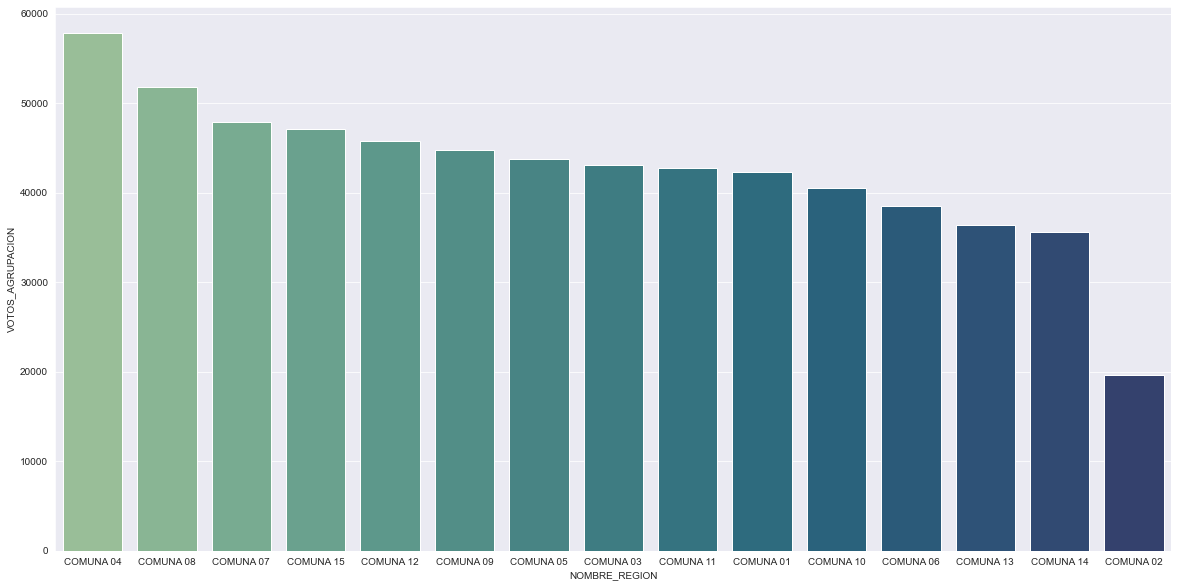

In [9]:
resultados_absolutos=comuna_final.loc[comuna_final.NOMBRE_AGRUPACION == "FdT"].sort_values(by="VOTOS_AGRUPACION", ascending=False)

#Grafico. Cambiar nombres de ejes.
plt.figure(figsize=(20,10))
sns.barplot(data=resultados_absolutos,x="NOMBRE_REGION", y="VOTOS_AGRUPACION", palette="crest")
plt.show()

### Desempeño comparado con Consenso y JxC

In [10]:
temp=comuna_final.loc[(comuna_final.NOMBRE_AGRUPACION =="FdT") | (comuna_final.NOMBRE_AGRUPACION == "JxC") | (comuna_final.NOMBRE_AGRUPACION=="CONSENSO FEDERAL"),: ]
temp

,NOMBRE_REGION,NOMBRE_AGRUPACION,VOTOS_AGRUPACION
1,COMUNA 01,CONSENSO FEDERAL,8305
3,COMUNA 01,FdT,42299
7,COMUNA 01,JxC,54568
15,COMUNA 02,CONSENSO FEDERAL,6604
17,COMUNA 02,FdT,19615
21,COMUNA 02,JxC,65519
29,COMUNA 03,CONSENSO FEDERAL,9685
31,COMUNA 03,FdT,43139
35,COMUNA 03,JxC,46502
43,COMUNA 04,CONSENSO FEDERAL,10671


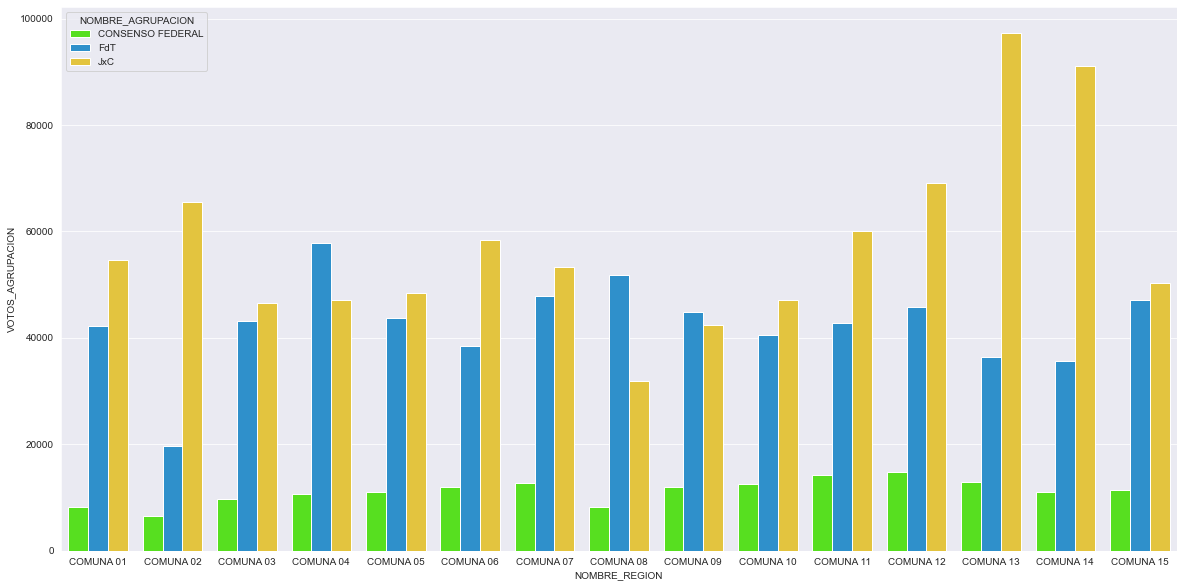

In [11]:
plt.figure(figsize=(20,10))
sns.barplot(data=temp, x="NOMBRE_REGION", y="VOTOS_AGRUPACION", hue="NOMBRE_AGRUPACION", palette=["#49FF00", "#1597E5", "#FFD523"])


### Todas las comunas comparado con todas las fuerzas políticas. 

<Figure size 1440x720 with 0 Axes>

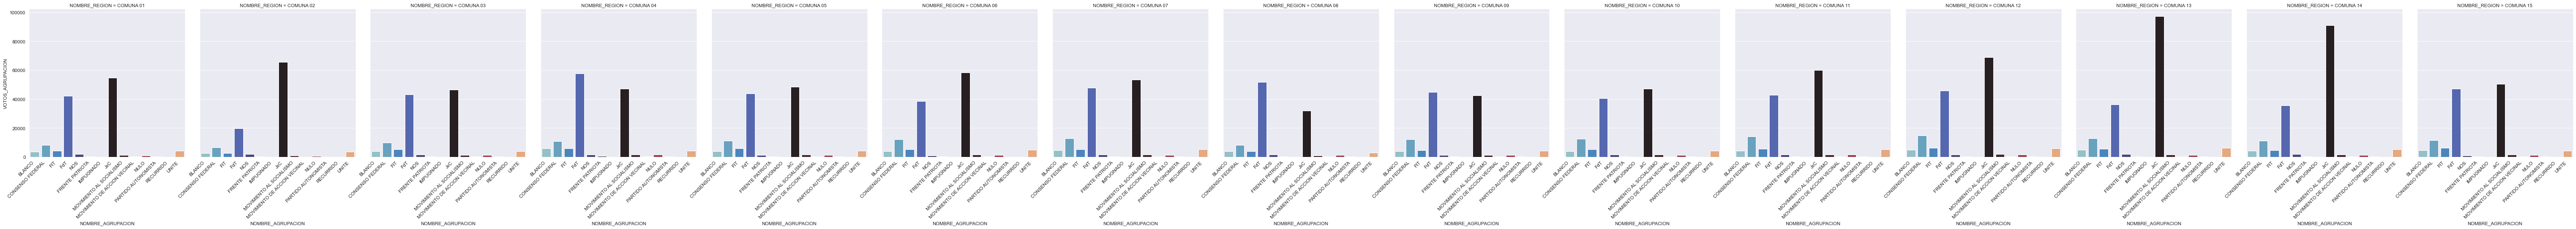

In [14]:
plt.figure(figsize=(20,10))
fig2=sns.catplot(x="NOMBRE_AGRUPACION", y="VOTOS_AGRUPACION", kind="bar", data=comuna_final, col="NOMBRE_REGION", palette="icefire")
fig2.set_xticklabels(comuna_final.NOMBRE_AGRUPACION, rotation=45, ha='right')